# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use the Score/Rating. A rating of 4 or 5 could be cosnidered a positive review. A review of 1 or 2 could be considered negative. A review of 3 is nuetral and ignored. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




## Loading the data

The dataset is available in two forms
1. .csv file
2. SQLite Database

In order to load the data, We have used the SQLITE dataset as it easier to query the data and visualise the data efficiently.
<br> 

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score id above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".

In [1]:
%matplotlib inline
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
#The resulting plots will then also be stored in the notebook document.

import warnings
#This is the base class of all warning category classes. It is a subclass of Exception.

warnings.filterwarnings("ignore")
# ignore all the warning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3  # For forming connection between the code and sql
import time

## [1] Reading Data

In [2]:
connection = sqlite3.connect('/home/kushagra/Desktop/Excercise/reviews_dataset/database.sqlite')
data = pd.read_sql_query('''SELECT*FROM Reviews where score != 3''',connection)

def positive_negative(x):
    if x<3:
        return 0
    return 1

filter_data = data['Score'].map(positive_negative)
data['Score'] = filter_data
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# SQL Query for Total Number of users i.e. unique userid's
unique = pd.read_sql_query('''SELECT *,COUNT(*) FROM Reviews GROUP BY UserId HAVING COUNT(*)>1''',connection)
#group by Groups together same UserId's, used with count

In [4]:
print(unique.shape) #Total Number of users i.e. unique userid's
print(unique['COUNT(*)'].sum())  # Total number of reviews i.e. unique
redundant = pd.read_sql_query('''select count(*) from Reviews''',connection)
print("Percentage of redundant data = ",(1-unique['COUNT(*)'].sum()/redundant['count(*)'].sum())*100)
unique[unique['UserId']=="AR5J8UI46CURR"]

(80668, 11)
393063
Percentage of redundant data =  30.854035682746538


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,COUNT(*)
75417,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...,5


#  Exploratory Data Analysis

## [2] Data Cleaning: Deduplication

It is observed (as shown in the table below) that the reviews data had many duplicate entries. Hence it was necessary to remove duplicates in order to get unbiased results for the analysis of the data.  Following is an example:

In [5]:
x = pd.read_sql_query('''select * from Reviews where UserId = "AR5J8UI46CURR"''',connection)
x
# As you can see there is redundancy.
# This redundancy is due to the fact that one product has many variations for eg:-
# A speaker of same model might have different colors, they will share the same review. Hence this redundancy.
# We need to remove this redundancy because we don't want our data to be baised.
# There might be more other redundancy, you need to figure these redundacy on you own.

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


As can be seen above the same user has multiple reviews of the with the same values for HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary and Text and on doing analysis it was found that 

ProductId=B000HDOPZG was Loacker Quadratini Vanilla Wafer Cookies, 8.82-Ounce Packages (Pack of 8)

ProductId=B000HDL1RQ was Loacker Quadratini Lemon Wafer Cookies, 8.82-Ounce Packages (Pack of 8) and so on

It was inferred after analysis that reviews with same parameters other than ProductId belonged to the same product just having different flavour or quantity. Hence in order to reduce redundancy it was decided to eliminate the rows having same parameters.

The method used for the same was that we first sort the data according to ProductId and then just keep the first similar product review and delelte the others. for eg. in the above just the review for ProductId=B000HDL1RQ remains. This method ensures that there is only one representative for each product and deduplication without sorting would lead to possibility of different representatives still existing for the same product.

In [6]:
# There is another type of redundancy. i.e. HelpfulnessNumerator cannot be greater than HelpfulnessDenominator
x = pd.read_sql_query('''select * from Reviews Where "HelpfulnessNumerator">"HelpfulnessDenominator"''',connection)
x

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
1,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [7]:
# Need to remove the redundancy discovered above
# Before we remove the redundancy we need to sort the data, then we can use pandas inbuit fn to remove redundancy
sorted_data = data.sort_values('ProductId',axis=0,ascending=True,kind='quicksort',na_position='last') #na_position is the position of NaN data

In [8]:
non_redundant = sorted_data.drop_duplicates(subset={"UserId","Time","ProfileName","Text"},keep='first')
non_redundant = non_redundant[non_redundant['HelpfulnessNumerator']<=non_redundant['HelpfulnessDenominator']]

In [9]:
print(non_redundant.shape[1])

10


In [10]:
# Percentage of data remained
print("Percentage of data remained = ",(non_redundant["Id"].size*1.0/data["Id"].size*1.0)*100)

Percentage of data remained =  69.25852107399194


In [11]:
print(non_redundant.shape)
print(pd.value_counts(non_redundant['Score']))

(364171, 10)
1    307061
0     57110
Name: Score, dtype: int64


In [12]:
# Remove the entries that have missing values i.e. Nan Score
print(non_redundant.isna().any())
non_redundant.dropna(axis=0,inplace=True)

Id                        False
ProductId                 False
UserId                    False
ProfileName               False
HelpfulnessNumerator      False
HelpfulnessDenominator    False
Score                     False
Time                      False
Summary                   False
Text                      False
dtype: bool


## [3].  Text Preprocessing.

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags and html links
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and remove not alpha-numeric(words made up of alphabets+numbers)
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Perform decontraction
6. Convert the word to lowercase
7. Remove Stopwords
8. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative reviews

### [1]. Removing HTML links and tags

In [13]:
# Removing html links
# We need to regular expression package in python to remove html's as the re package has functions that can search for a pattern in text.
# So we will search for html links and susitute them with backspace.
import re
# Here is an example with link
print(non_redundant['Text'].values[0])

print("\n",'='*50,'\n')
print(re.sub(r"http\S+","",non_redundant['Text'].values[0]))
# r is used for creating regular expressions, \S used for non-whitespace
# + used for sequence i.e. \S+   ----> sequence of non-whitespace.
# sub is for subsituting the following pattern with "" .

this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


| Code	   | Meaning                                 |
| ---      | ---                                     |
| \d	   | a digit                                 |  
| \D	   | a non-digit                             |
| \s	   | whitespace (tab, space, newline, etc.)  |
| \S	   | non-whitespace                          |      
| \w	   | alphanumeric                            |  
| \W	   | non-alphanumeric                        |       

| Code	   |Meaning                                              |
| ---      | ---                                                 |
| ^	       |start of string, or line                             |                 
| $	       |end of string, or line                               |  
| \A	   |start of string                                      |           
| \Z	   |end of string                                        |        
| \b	   |empty string at the beginning or end of a word       |                     
| \B	   |empty string not at the beginning or end of a word   |


> ## Repetition
> There are five ways to express repetition in a pattern. A pattern followed by the metacharacter * is repeated zero or more times (allowing a pattern to repeat zero times means it does not need to appear at all to match). Replace the * with + and the pattern must appear at least once. Using ? means the pattern appears zero or one time. For a specific number of occurrences, use {m} after the pattern, where m is replaced with the number of times the pattern should repeat. And finally, to allow a variable but limited number of repetitions, use {m,n} where m is the minimum number of repetitions and n is the maximum. Leaving out n ({m,}) means the value appears at least m times, with no maximum.

In [14]:
# Removing html tags
# We need to use BeautifulSoup from bs4
#BeautifulSoap is used for html processing
from bs4 import BeautifulSoup


print(non_redundant['Text'].values[0])
print("\n",'='*50,'\n')

print(BeautifulSoup(non_redundant['Text'].values[0]))
# As you can see here BeautifulSoup converts the text into standard html format.
# This will also help us remove all the html standard tags
print("\n",'='*50,'\n')

text = BeautifulSoup(non_redundant['Text'].values[0])
text = text.get_text() # Extracting text from the html object.
print(text)
# As you can see all the tags have been removed.

this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


<html><body><p>this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college</p></body></html>


this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words th

### [2.] Removing all Special Characters and Punctuations

In [15]:
# Removing all the special characters
# Here is a regex to match a string of characters that are not a letters or numbers:
print(re.sub('[^A-Za-z0-9]+',' ',non_redundant['Text'].values[0]))# the re will search for character that does not contain A-Za-z0-9.
# A character set can also be used to exclude specific characters.
#The special marker ^ means to look for characters not in the set following.

# As you can see "$[...]" is removed. All special characters are removed.

this witty little book makes my son laugh at loud i recite it in the car as we re driving along and he always can sing the refrain he s learned about whales India drooping roses i love all the new words this book introduces and the silliness of it all this is a classic book i am willing to bet my son will STILL be able to recite from memory when he is in college


### [3.] Removing Alfa-Numeric letters

In [16]:
# Removing Alfa-Numeric Words
print(re.sub('\S*\d\S*','',non_redundant['Text'].values[0]))  # \S*  --> Means all character excluding white spaces might occurs 0 or more times
# \d  ----> digit must occur one time.
#\S*\d\S*  ---> eg:- saj3434jkdsd
#This will remove all digits and string with digits.

# As you can see all alpha-numeric letters are removed.

this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


### [4.] Perform Decontraction

In [17]:
# We need to replace words that use short forms such as --> I'm or won't or couldn't or wouldn't etc. to their full form
def decontraction(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

print(non_redundant['Text'].values[900])
# As we can there is "'t" in our sentence. we need to replace all these words to their original words.
print("\n",'='*50,'\n')

# For this to fully work first we need to convert the sentence to lower case.
# Anyways we can are going to use it here as this is just an example.
print(decontraction(non_redundant['Text'].values[900]))

I used this food coloring for dyeing wool fabric for rug hooking.  It was fabulous.  Not only was it easy to use, but it was food safe and made an unending variety of brilliant colours.  Ateco was easily mixed with boiling water and used for spot dyeing and caserole dyeing.  The variety of colours was perfect, and I will buy them again.<br /><br />Mari


I used this food coloring for dyeing wool fabric for rug hooking.  It was fabulous.  Not only was it easy to use, but it was food safe and made an unending variety of brilliant colours.  Ateco was easily mixed with boiling water and used for spot dyeing and caserole dyeing.  The variety of colours was perfect, and I will buy them again.<br /><br />Mari


### [5.] Converting to Lower Case

In [18]:
def lower_case(sentence):
    sentence = ' '.join(e.lower() for e in sentence.split())
    return sentence

print(lower_case(non_redundant['Text'].values[900]))

i used this food coloring for dyeing wool fabric for rug hooking. it was fabulous. not only was it easy to use, but it was food safe and made an unending variety of brilliant colours. ateco was easily mixed with boiling water and used for spot dyeing and caserole dyeing. the variety of colours was perfect, and i will buy them again.<br /><br />mari


### [6.] Removing Stop Words

In [19]:
import nltk
from nltk.corpus import stopwords
#  *********  we are removing the words from the stop words list: 'no', 'nor', 'not'  *********
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have removed in the 1st step
# https://gist.github.com/sebleier/554280

stopwords = set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])
# Creating sets of stop keywords
print(stopwords)

def rm_stop_words(sentence):
    sentence = ' '.join(e for e in sentence.split() if e not in stopwords)
    return sentence

print(non_redundant['Text'].values[900])
print("\n",'='*50,'\n')
print(rm_stop_words(non_redundant['Text'].values[900]))

{"couldn't", 'hers', "mightn't", 'further', 'did', 'whom', 'being', "won't", 've', 'until', 'himself', 'which', 'again', 'hasn', 'her', 'this', 'can', 'their', 'of', 'ain', 'mightn', 're', 'through', 'too', 'below', 'own', "you're", 'does', 'from', "aren't", 'they', 'he', 'aren', 'its', 'ma', 'above', "should've", 'i', 'on', "doesn't", 'than', 'such', 'we', 'had', 't', 'here', 's', "you'll", 'should', 'with', 'over', 'most', 'him', 'y', 'd', 'shouldn', 'about', 'them', 'by', 'there', 'only', 'when', 'were', 'into', "mustn't", 'weren', 'will', 'has', 'how', 'having', 'won', 'then', "haven't", 'now', "wouldn't", 'didn', 'herself', 'and', 'up', 'those', 'why', 'each', 'where', 'haven', 'same', 'o', 'while', 'for', 'down', 'what', "that'll", 'theirs', 'me', 'just', 'shan', 'but', 'my', 'at', "you've", "isn't", 'very', 'because', 'other', "didn't", 'these', 'mustn', "shouldn't", 'ourselves', 'hadn', 'doing', 'don', 'or', 'll', 'after', 'br', 'so', 'before', 'it', 'themselves', 'that', "wasn

### [7.] Stemming the words

In [20]:
# As snow ball stemming is better than porter stemming we are going to use snow ball stemming
from nltk.stem import SnowballStemmer
print(" ".join(SnowballStemmer.languages)) # languages supported by th snowball stemming

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [21]:
stemmer = SnowballStemmer('english') # Selecting english language for stemming
stemmer.stem('manly')

'man'

### Now we need to use all these technique at one to apply at our Amazon Fine Food DataSet

### __*Run the below cell if you don't want to stem your text.*__

In [22]:
from tqdm import tqdm
import pdb
# This package is used for visualizing loading status bar
# https://gist.github.com/sebleier/554280
index,reviews = [],[]
preprocessed_review = []
for review in tqdm(non_redundant['Text'].values):
    review = re.sub(r'http\S+','',review)
    review = BeautifulSoup(review).get_text()
    review = re.sub('[^A-Za-z0-9]+',' ',review)  # This line of code should be carefully written.
    # If ' ' space is not given in subsituition, then the words will cramp
    # If * is used instead of + , then all letter will have spacing
    review = re.sub('\S*\d\S*','',review)
    review = ' '.join(e.lower() for e in review.split() if e.lower() not in stopwords) #Removing Stop words and loweri casing letter at same time.
    preprocessed_review.append(decontraction(review))
    

100%|██████████| 364171/364171 [02:02<00:00, 2975.51it/s]


In [23]:
print(preprocessed_review[1500])
print('\n',len(preprocessed_review))
print(type(preprocessed_review))

great ingredients although chicken rather chicken broth thing not think belongs canola oil canola rapeseed not someting dog would ever find nature find rapeseed nature eat would poison today food industries convinced masses canola oil safe even better oil olive virgin coconut facts though say otherwise late poisonous figured way fix still like could better

 364171
<class 'list'>


### __Preprocess Summary for future use in Feature Engineering__

In [24]:
from tqdm import tqdm
preprocessed_summary = []
for review in tqdm(non_redundant['Summary'].values):
    review = re.sub(r'http\S+','',review)
    review = BeautifulSoup(review).get_text()
    review = re.sub('[^A-Za-z0-9]+',' ',review)  # This line of code should be carefully written.
    # If ' ' space is not given in subsituition, then the words will cramp
    # If * is used instead of + , then all letter will have spacing
    review = re.sub('\S*\d\S*','',review)
    review = ' '.join(e.lower() for e in review.split() if e.lower() not in stopwords) #Removing Stop words and loweri casing letter at same time.
    preprocessed_summary.append(decontraction(review))

  6%|▌         | 22509/364171 [00:04<01:11, 4811.25it/s]/home/kushagra/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:272: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
 27%|██▋       | 98321/364171 [00:21<00:58, 4548.73it/s]/home/kushagra/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:272: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/home/kushagra/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:272: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
 60%|█████▉    | 216689/364171 [00:45<00:30, 4867.99it/s]/home/kushagra/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:272: UserWarning: "b'.'" looks like a file

In [25]:
preprocessed_summary[1500]

'would best canola oil left'

# [4.] Featurization

## [4.1] Bag of Words

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

def bag_of_words(data):
    bow = CountVectorizer()
    bow = bow.fit(data)
    #https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models
    #http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
    return bow

## [4.3] TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tf_idf(data):
    tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=10)
    tfidf = tfidf.fit(data)
    return tfidf

# Applying Multinomial Naive Bayes

## Finding Right Hyper-Parameter

In [28]:
# As we have only two class labels +ve and -ve we are going to use Bernoulli distribution
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import scikitplot.metrics as skplt
from tqdm import tqdm
from sklearn.metrics import roc_curve

def NB_binary_clf(train_data, cv_data, train_label, cv_label, best_alpha=1, test=False, class_prior_=None):
    l = alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
    auc_cv=[]
    auc_train,f1=[],[]
    
    if test==False:
        for i in tqdm(l):
            clf= MultinomialNB(alpha=i, class_prior= class_prior_)
            clf = clf.fit(train_data, train_label)
            # Pedicting probabilities 
            train_probab = clf.predict_proba(train_data)[:,1]
            cv_probab = clf.predict_proba(cv_data)[:,1]
            # Computing Area under the curve
            auc_train.append(roc_auc_score(train_label, train_probab))
            auc_cv.append(roc_auc_score(cv_label, cv_probab))
            f1.append(f1_score(cv_label, clf.predict(cv_data)))
            print("alpha =",i," ------>",auc_cv)
        
        
    else:
        clf = MultinomialNB(alpha=best_alpha,class_prior= class_prior_)
        clf = clf.fit(train_data, train_label)
        train_probab = clf.predict_proba(train_data)[:,1]
        cv_probab = clf.predict_proba(cv_data)[:,1]
        fpr_train, tpr_train, threshold_train = roc_curve(train_label, train_probab)
        fpr_cv, tpr_cv, threshold_cv = roc_curve(cv_label, cv_probab)
        
    
    if test==False:
        auc_train = np.array(auc_train)
        auc_cv = np.array(auc_cv)
        auc_diff = auc_train-auc_cv
        # Plotting curve of different values of alpha between auc and alpha, to determine best alpha
        best_alpha = l[np.argmax(auc_cv)]
        plt.plot(np.log(l), auc_train, label = 'Train',marker=',')
        plt.plot(np.log(l), auc_cv, label='CV',marker=',')
        plt.plot(np.log(l), auc_diff, label='Difference',marker=',')
        plt.grid()
        plt.xlabel('log(alpha)')
        plt.ylabel('AUC')
        plt.legend()
        plt.title("AUC V/S Alpha")
        plt.grid()
        plt.legend()
        plt.show()
        plt.plot(np.log(l), f1,marker=',')
        plt.title("Alpha-hyperparameter V/S F1 Scores")
        plt.xlabel('log(Alpha-hyperparameter)')
        plt.ylabel('F1-Scores')
        plt.show()
        # Top 10 features
        probab = clf.feature_log_prob_
        idx = np.argsort(probab)
        
        
    else:
        plt.plot(fpr_train, tpr_train, label="Train, auc = "+str(roc_auc_score(train_label, train_probab)),marker=',')
        plt.plot(fpr_cv, tpr_cv, label="Test, auc = "+str(roc_auc_score(cv_label, cv_probab)),marker=',')
        plt.plot([0,0.5,1],[0,0.5,1], label="Random Precision, auc = 0.5",marker=',')
        plt.grid()
        plt.legend()
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC')
        plt.show()

    
    clf= MultinomialNB(alpha=best_alpha, class_prior= class_prior_)
    clf = clf.fit(train_data, train_label)
    y = clf.predict(cv_data)
    print("Accuracy score of Test Data is :", accuracy_score(cv_label, y)*100)
    #Confusion matrix
    skplt.plot_confusion_matrix(train_label, clf.predict(train_data))
    plt.title("Train Confusion Matrix")
    plt.show()
    skplt.plot_confusion_matrix(cv_label, y)
    plt.title("Test Confusion Matrix")
    plt.show()
    if test==False:
        return best_alpha, idx
    else:
        return roc_auc_score(cv_label, cv_probab)

## [5.1] Applying Naive Bayes on BOW,<font color='red'> SET 1</font>

In [29]:
from sklearn.model_selection import train_test_split as tts

# The code below creeps NaN values in Score, so don't use it

In [30]:
non_redundant['Text']=preprocessed_review
non_redundant['Summary'] = preprocessed_summary # Will be used later in this assignment
data = non_redundant
print(data['Text'].iloc[30])

remember seeing show aired television years ago child sister later bought lp day thirty something used series books songs student teaching preschoolers turned whole school purchasing cd along books children tradition lives


In [31]:
sorted_data = data.sort_values('Time', axis=0, ascending=True, kind = 'quicksort')
print(sorted_data.shape)
train_and_cv, test = tts(sorted_data, test_size=0.3, random_state=0)
train, cv = tts(train_and_cv, test_size=0.3, random_state=0)
print("Train Data : ", train.shape, "  CV Data : ", cv.shape, "  Test Data : ", test.shape)
print("Test :", test['Time'].iloc[0])
print("CV :",cv['Time'].iloc[0])
print("Train :",train['Time'].iloc[0])

(364171, 10)
Train Data :  (178443, 10)   CV Data :  (76476, 10)   Test Data :  (109252, 10)
Test : 1254960000
CV : 1328659200
Train : 1229212800


In [32]:
from sklearn.preprocessing import Normalizer
# Computing BOW for train, test, cv dataset
bow = bag_of_words(train['Text'])
train_bow = bow.transform(train['Text'])
cv_bow = bow.transform(cv['Text'])
test_bow = bow.transform(test['Text'])
train_label = train['Score']
cv_label = cv['Score']
test_label = test['Score']
features = np.array(bow.get_feature_names())

print(pd.isna(data['Score']).any())
print(train_bow.shape, train_label.shape)
print(features[0:3])

# Normalize Data
train_bow = Normalizer().fit_transform(train_bow)
cv_bow = Normalizer().fit_transform(cv_bow)
test_bow = Normalizer().fit_transform(test_bow)

False
(178443, 79928) (178443,)
['aa' 'aaa' 'aaaa']


  0%|          | 0/11 [00:00<?, ?it/s]

1    307061
0     57110
Name: Score, dtype: int64


  9%|▉         | 1/11 [00:00<00:04,  2.38it/s]

alpha = 1e-05  ------> [0.9010375084799944]


 18%|█▊        | 2/11 [00:00<00:03,  2.43it/s]

alpha = 0.0001  ------> [0.9010375084799944, 0.9161063621250162]


 27%|██▋       | 3/11 [00:01<00:03,  2.48it/s]

alpha = 0.001  ------> [0.9010375084799944, 0.9161063621250162, 0.9299859902117054]


 36%|███▋      | 4/11 [00:01<00:02,  2.52it/s]

alpha = 0.01  ------> [0.9010375084799944, 0.9161063621250162, 0.9299859902117054, 0.9400355854433581]


 45%|████▌     | 5/11 [00:01<00:02,  2.54it/s]

alpha = 0.1  ------> [0.9010375084799944, 0.9161063621250162, 0.9299859902117054, 0.9400355854433581, 0.9428990840185799]


 55%|█████▍    | 6/11 [00:02<00:01,  2.56it/s]

alpha = 1  ------> [0.9010375084799944, 0.9161063621250162, 0.9299859902117054, 0.9400355854433581, 0.9428990840185799, 0.9237718747391718]


 64%|██████▎   | 7/11 [00:02<00:01,  2.58it/s]

alpha = 10  ------> [0.9010375084799944, 0.9161063621250162, 0.9299859902117054, 0.9400355854433581, 0.9428990840185799, 0.9237718747391718, 0.7785350561869281]


 73%|███████▎  | 8/11 [00:03<00:01,  2.58it/s]

alpha = 100  ------> [0.9010375084799944, 0.9161063621250162, 0.9299859902117054, 0.9400355854433581, 0.9428990840185799, 0.9237718747391718, 0.7785350561869281, 0.6943784160432828]


 82%|████████▏ | 9/11 [00:03<00:00,  2.56it/s]

alpha = 1000  ------> [0.9010375084799944, 0.9161063621250162, 0.9299859902117054, 0.9400355854433581, 0.9428990840185799, 0.9237718747391718, 0.7785350561869281, 0.6943784160432828, 0.6489167359007392]


 91%|█████████ | 10/11 [00:03<00:00,  2.58it/s]

alpha = 10000  ------> [0.9010375084799944, 0.9161063621250162, 0.9299859902117054, 0.9400355854433581, 0.9428990840185799, 0.9237718747391718, 0.7785350561869281, 0.6943784160432828, 0.6489167359007392, 0.5989980686435102]


100%|██████████| 11/11 [00:04<00:00,  2.58it/s]

alpha = 100000  ------> [0.9010375084799944, 0.9161063621250162, 0.9299859902117054, 0.9400355854433581, 0.9428990840185799, 0.9237718747391718, 0.7785350561869281, 0.6943784160432828, 0.6489167359007392, 0.5989980686435102, 0.5806747548079052]


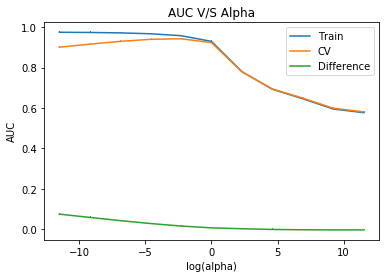

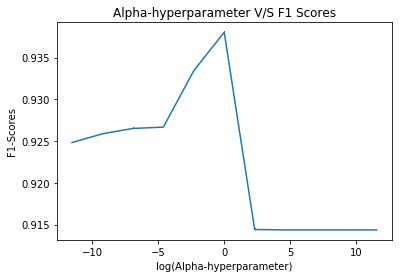

Accuracy score of Test Data is : 89.12992311313353


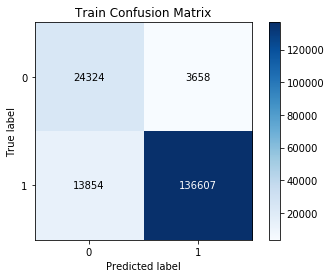

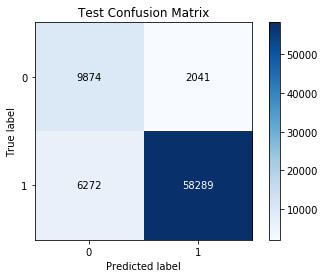

Best value of alpha is:  0.1


In [33]:
print(data['Score'].value_counts())
# As we can see there are large number of +ve examples and very less number of negative example, we need to use prior
best_alpha_bow, idx = NB_binary_clf(train_bow, cv_bow, train_label, cv_label, class_prior_=[1/2,1/2])
print("Best value of alpha is: ",best_alpha_bow)

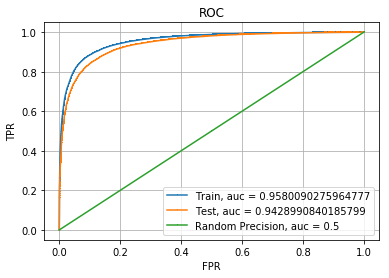

Accuracy score of Test Data is : 89.12992311313353


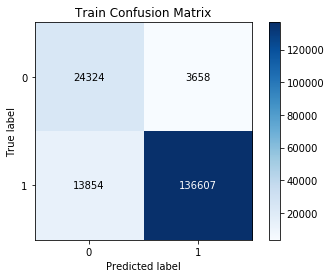

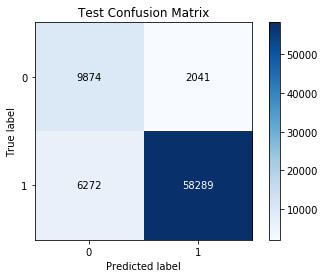

AUC of Test Data 94.28990840185799


In [34]:
# As we can see there are large number of +ve examples and very less number of negative example, we need to use prior
auc_bow = NB_binary_clf(train_bow, cv_bow, train_label, cv_label, best_alpha=best_alpha_bow, test=True, class_prior_=[1/2,1/2])
print("AUC of Test Data" ,auc_bow*100)

### [5.1.1] Top 10 important features of positive class from<font color='red'> SET 1</font>

In [35]:
print("Here are top 10 features from positive class: ")
for i in idx[1, features.shape[0]-11:features.shape[0]-1]:
    if i>features.shape[0]-1:
        i = i-(features.shape[0]-1)
        print(features[i], end=', ')
    else:
        print(features[i], end=', ')

Here are top 10 features from positive class: 
tea, coffee, flavor, one, product, taste, love, like, good, great, 

### [5.1.2] Top 10 important features of negative class from<font color='red'> SET 1</font>

In [36]:
print("Here are top 10 features from negative class: ")
for i in idx[0, features.shape[0]-11:features.shape[0]-1]:
    if i>features.shape[0]-1:
        i = i-(features.shape[0]-1)
        print(features[i], end=', ')
    else:
        print(features[i], end=', ')

Here are top 10 features from negative class: 
buy, no, flavor, coffee, good, would, one, taste, product, like, 

## [5.2] Applying Naive Bayes on TFIDF,<font color='red'> SET 2</font>

In [37]:
tfidf = tf_idf(train['Text'])
train_tfidf = tfidf.transform(train['Text'])
cv_tfidf = tfidf.transform(cv['Text'])
test_tfidf = tfidf.transform(test['Text'])

# Normalizer Data
train_tfidf = Normalizer().fit_transform(train_tfidf)
cv_tfidf = Normalizer().fit_transform(cv_tfidf)
test_tfidf = Normalizer().fit_transform(test_tfidf)

  0%|          | 0/11 [00:00<?, ?it/s]

1    307061
0     57110
Name: Score, dtype: int64


  9%|▉         | 1/11 [00:00<00:02,  3.94it/s]

alpha = 1e-05  ------> [0.9229607774221901]


 18%|█▊        | 2/11 [00:00<00:02,  3.64it/s]

alpha = 0.0001  ------> [0.9229607774221901, 0.9335245343997114]


 27%|██▋       | 3/11 [00:00<00:02,  3.23it/s]

alpha = 0.001  ------> [0.9229607774221901, 0.9335245343997114, 0.9439058187904841]


 36%|███▋      | 4/11 [00:01<00:02,  3.09it/s]

alpha = 0.01  ------> [0.9229607774221901, 0.9335245343997114, 0.9439058187904841, 0.9528782542903811]


 45%|████▌     | 5/11 [00:01<00:01,  3.06it/s]

alpha = 0.1  ------> [0.9229607774221901, 0.9335245343997114, 0.9439058187904841, 0.9528782542903811, 0.9586502514483972]


 55%|█████▍    | 6/11 [00:01<00:01,  3.27it/s]

alpha = 1  ------> [0.9229607774221901, 0.9335245343997114, 0.9439058187904841, 0.9528782542903811, 0.9586502514483972, 0.9562555454179729]


 64%|██████▎   | 7/11 [00:02<00:01,  3.44it/s]

alpha = 10  ------> [0.9229607774221901, 0.9335245343997114, 0.9439058187904841, 0.9528782542903811, 0.9586502514483972, 0.9562555454179729, 0.852863207705344]


 73%|███████▎  | 8/11 [00:02<00:00,  3.45it/s]

alpha = 100  ------> [0.9229607774221901, 0.9335245343997114, 0.9439058187904841, 0.9528782542903811, 0.9586502514483972, 0.9562555454179729, 0.852863207705344, 0.7122964464157268]


 82%|████████▏ | 9/11 [00:02<00:00,  3.55it/s]

alpha = 1000  ------> [0.9229607774221901, 0.9335245343997114, 0.9439058187904841, 0.9528782542903811, 0.9586502514483972, 0.9562555454179729, 0.852863207705344, 0.7122964464157268, 0.658198796048301]


 91%|█████████ | 10/11 [00:02<00:00,  3.63it/s]

alpha = 10000  ------> [0.9229607774221901, 0.9335245343997114, 0.9439058187904841, 0.9528782542903811, 0.9586502514483972, 0.9562555454179729, 0.852863207705344, 0.7122964464157268, 0.658198796048301, 0.6369048382242513]


100%|██████████| 11/11 [00:03<00:00,  3.71it/s]

alpha = 100000  ------> [0.9229607774221901, 0.9335245343997114, 0.9439058187904841, 0.9528782542903811, 0.9586502514483972, 0.9562555454179729, 0.852863207705344, 0.7122964464157268, 0.658198796048301, 0.6369048382242513, 0.6329694487244926]


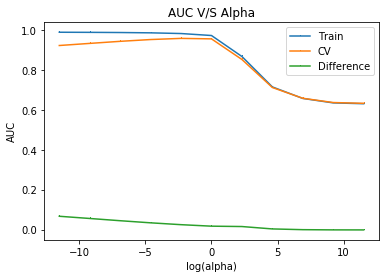

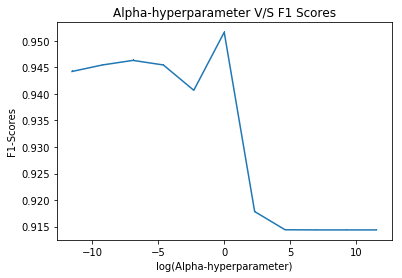

Accuracy score of Test Data is : 90.32376170301794


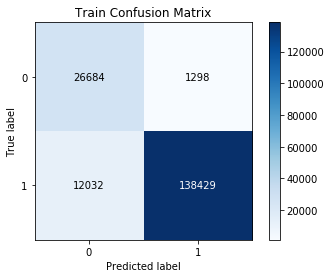

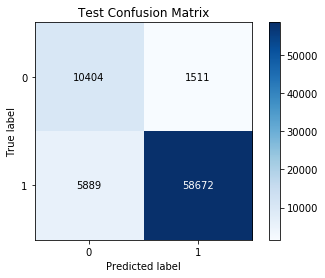

Best value of alpha is:  0.1


In [38]:
print(data['Score'].value_counts())
# As we can see there are large number of +ve examples and very less number of negative example, we need to use prior
best_alpha_tfidf, idx = NB_binary_clf(train_tfidf, cv_tfidf, train_label, cv_label, class_prior_=[1/2,1/2])
print("Best value of alpha is: ",best_alpha_tfidf)

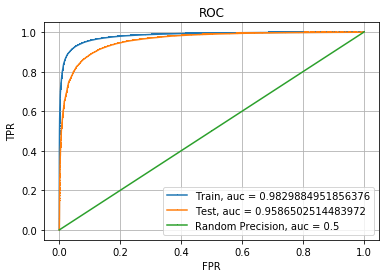

Accuracy score of Test Data is : 90.32376170301794


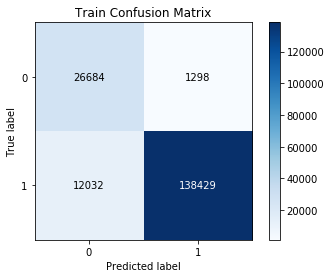

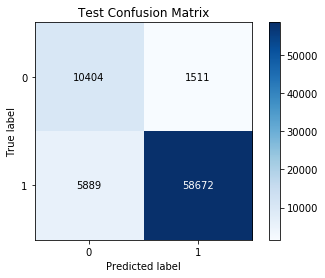

AUC of Test Data 95.86502514483972


In [39]:
auc_tfidf = NB_binary_clf(train_tfidf, cv_tfidf, train_label, cv_label, best_alpha=best_alpha_tfidf, test=True, class_prior_=[1/2,1/2])
print("AUC of Test Data" ,auc_tfidf*100)

In [40]:
features = np.array(tfidf.get_feature_names())

### [5.2.1] Top 10 important features of positive class from<font color='red'> SET 2</font>

In [41]:
print("Here are top 10 features from positive class: ")
for i in idx[1, features.shape[0]-11:features.shape[0]-1]:
    if i>features.shape[0]-1:
        i = i-(features.shape[0]-1)
        print(features[i], end=', ')
    else:
        print(features[i], end=', ')

Here are top 10 features from positive class: 
flavor, one, taste, product, love, coffee, tea, like, not, good, 

### [5.2.2] Top 10 important features of negative class from<font color='red'> SET 2</font>

In [42]:
print("Here are top 10 features from negative class: ")
for i in idx[0, features.shape[0]-11:features.shape[0]-1]:
    if i>features.shape[0]-1:
        i = i-(features.shape[0]-1)
        print(features[i], end=', ')
    else:
        print(features[i], end=', ')

Here are top 10 features from negative class: 
buy, good, flavor, no, one, coffee, would, taste, product, like, 

# [6] Feature Engineering

> Our model performace is not good, we need to perform feature engineering to increase the performance of the model.
* Add another column i.e. Length of the Review.
* Use words from Summary of Reviews

In [43]:
non_redundant['Text'].iloc[0]

'witty little book makes son laugh loud recite car driving along always sing refrain learned whales india drooping roses love new words book introduces silliness classic book willing bet son still able recite memory college'

In [44]:
preprocessed_review_and_summary=[]
for i in range(len(preprocessed_review)):
    preprocessed_review_and_summary.append(preprocessed_review[i]+" "+preprocessed_summary[i]+" "+str(len(non_redundant['Text'].iloc[i])))

print(len(preprocessed_review_and_summary))
data['Text'] = preprocessed_review_and_summary
print(data.shape)
print(data['Text'].iloc[0])

364171
(364171, 10)
witty little book makes son laugh loud recite car driving along always sing refrain learned whales india drooping roses love new words book introduces silliness classic book willing bet son still able recite memory college every book educational 222


In [45]:
sorted_data = data.sort_values('Time', axis=0, ascending=True, kind = 'quicksort')
print(sorted_data.shape)
train_and_cv, test = tts(sorted_data, test_size=0.3, random_state=0)
train, cv = tts(train_and_cv, test_size=0.3, random_state=0)
print("Train Data : ", train.shape, "  CV Data : ", cv.shape, "  Test Data : ", test.shape)
print("Test :", test['Time'].iloc[0])
print("CV :",cv['Time'].iloc[0])
print("Train :",train['Time'].iloc[0])
print(train['Text'].iloc[0])
print(cv['Text'].iloc[0])

(364171, 10)
Train Data :  (178443, 10)   CV Data :  (76476, 10)   Test Data :  (109252, 10)
Test : 1254960000
CV : 1328659200
Train : 1229212800
good hard find local grocery stores mix egg yolk buttermilk fold beaten foam egg white fluffy waffles pancakes makes good waffles 110
child campbell tomato soup staple house high sodium content held back feeding kids happened upon grocery store one day kids loved soup flavor get picky daughter eat although low sodium version still considerable amount sodium prepackaged soup figure since eat every day diet generally low sodium anyway hurt anything not mention health benefits tomatoes daughter not eat regularly soup creamy pairs well sandwich crackers even grilled chicken often pack thermos daughter lunch would compare la madeleine creamy tomato basil soup smoother texture far less calories wonderful rich tasting tomato soup 563


In [46]:
from sklearn.preprocessing import Normalizer
# Computing BOW for train, test, cv dataset
bow = bag_of_words(train['Text'])
train_bow = bow.transform(train['Text'])
cv_bow = bow.transform(cv['Text'])
test_bow = bow.transform(test['Text'])
train_label = train['Score']
cv_label = cv['Score']
test_label = test['Score']
features = np.array(bow.get_feature_names())

print(pd.isna(data['Score']).any())
print(train_bow.shape, train_label.shape)
print(features[0:3])

# Normalize Data
train_bow = Normalizer().fit_transform(train_bow)
cv_bow = Normalizer().fit_transform(cv_bow)
test_bow = Normalizer().fit_transform(test_bow)

False
(178443, 85500) (178443,)
['10' '100' '1000']


  0%|          | 0/11 [00:00<?, ?it/s]

1    307061
0     57110
Name: Score, dtype: int64


  9%|▉         | 1/11 [00:00<00:04,  2.09it/s]

alpha = 1e-05  ------> [0.925702982933322]


 18%|█▊        | 2/11 [00:00<00:03,  2.35it/s]

alpha = 0.0001  ------> [0.925702982933322, 0.9385739587818728]


 27%|██▋       | 3/11 [00:01<00:03,  2.50it/s]

alpha = 0.001  ------> [0.925702982933322, 0.9385739587818728, 0.9497569364552274]


 36%|███▋      | 4/11 [00:01<00:03,  2.23it/s]

alpha = 0.01  ------> [0.925702982933322, 0.9385739587818728, 0.9497569364552274, 0.9572732012975617]


 45%|████▌     | 5/11 [00:02<00:02,  2.10it/s]

alpha = 0.1  ------> [0.925702982933322, 0.9385739587818728, 0.9497569364552274, 0.9572732012975617, 0.9593522468866085]


 55%|█████▍    | 6/11 [00:02<00:02,  2.32it/s]

alpha = 1  ------> [0.925702982933322, 0.9385739587818728, 0.9497569364552274, 0.9572732012975617, 0.9593522468866085, 0.9491751914994653]


 64%|██████▎   | 7/11 [00:02<00:01,  2.61it/s]

alpha = 10  ------> [0.925702982933322, 0.9385739587818728, 0.9497569364552274, 0.9572732012975617, 0.9593522468866085, 0.9491751914994653, 0.8320515192887711]


 73%|███████▎  | 8/11 [00:03<00:01,  2.68it/s]

alpha = 100  ------> [0.925702982933322, 0.9385739587818728, 0.9497569364552274, 0.9572732012975617, 0.9593522468866085, 0.9491751914994653, 0.8320515192887711, 0.7465111731114971]


 82%|████████▏ | 9/11 [00:03<00:00,  2.91it/s]

alpha = 1000  ------> [0.925702982933322, 0.9385739587818728, 0.9497569364552274, 0.9572732012975617, 0.9593522468866085, 0.9491751914994653, 0.8320515192887711, 0.7465111731114971, 0.7038504392456901]


 91%|█████████ | 10/11 [00:03<00:00,  2.79it/s]

alpha = 10000  ------> [0.925702982933322, 0.9385739587818728, 0.9497569364552274, 0.9572732012975617, 0.9593522468866085, 0.9491751914994653, 0.8320515192887711, 0.7465111731114971, 0.7038504392456901, 0.661702256454115]


100%|██████████| 11/11 [00:04<00:00,  2.68it/s]

alpha = 100000  ------> [0.925702982933322, 0.9385739587818728, 0.9497569364552274, 0.9572732012975617, 0.9593522468866085, 0.9491751914994653, 0.8320515192887711, 0.7465111731114971, 0.7038504392456901, 0.661702256454115, 0.6477756081954275]


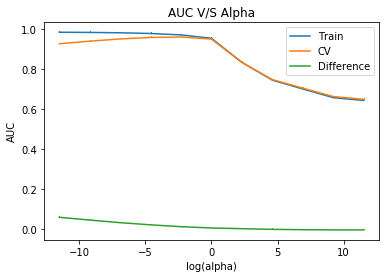

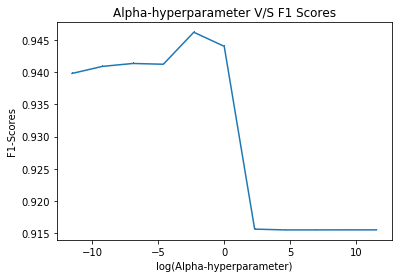

Accuracy score of Test Data is : 91.15670275642032


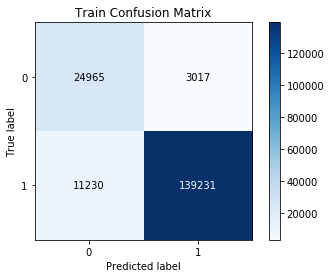

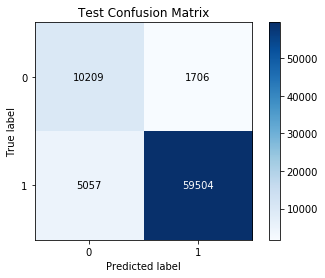

Best value of alpha is:  0.1


In [47]:
print(data['Score'].value_counts())
# As we can see there are large number of +ve examples and very less number of negative example, we need to use prior
best_alpha_bow_final, idx = NB_binary_clf(train_bow, cv_bow, train_label, cv_label, class_prior_=[1/2,1/2])
print("Best value of alpha is: ",best_alpha_bow_final)

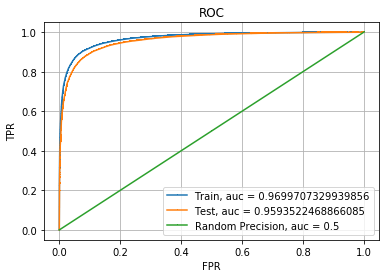

Accuracy score of Test Data is : 91.15670275642032


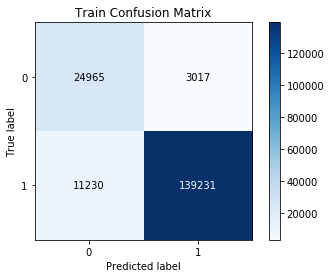

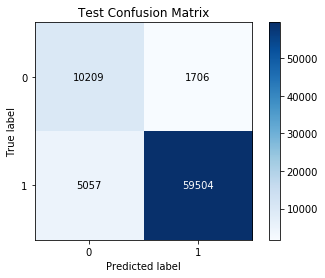

AUC of Test Data 95.93522468866085


In [48]:
# As we can see there are large number of +ve examples and very less number of negative example, we need to use prior
auc_bow_final = NB_binary_clf(train_bow, cv_bow, train_label, cv_label, best_alpha=best_alpha_bow_final, test=True, class_prior_=[1/2,1/2])
print("AUC of Test Data" ,auc_bow_final*100)

### [5.1.1] Top 10 important features of positive class from<font color='red'> SET 1</font>

In [49]:
print("Here are top 10 features from positive class: ")
for i in idx[1, features.shape[0]-11:features.shape[0]-1]:
    if i>features.shape[0]-1:
        i = i-(features.shape[0]-1)
        print(features[i], end=', ')
    else:
        print(features[i], end=', ')

Here are top 10 features from positive class: 
best, tea, one, coffee, taste, product, love, like, not, good, 

### [5.1.2] Top 10 important features of negative class from<font color='red'> SET 1</font>

In [50]:
print("Here are top 10 features from negative class: ")
for i in idx[0, features.shape[0]-11:features.shape[0]-1]:
    if i>features.shape[0]-1:
        i = i-(features.shape[0]-1)
        print(features[i], end=', ')
    else:
        print(features[i], end=', ')

Here are top 10 features from negative class: 
buy, flavor, no, coffee, would, good, one, product, taste, like, 

## [5.2] Applying Naive Bayes on TFIDF,<font color='red'> SET 2</font>

In [51]:
tfidf = tf_idf(train['Text'])
train_tfidf = tfidf.transform(train['Text'])
cv_tfidf = tfidf.transform(cv['Text'])
test_tfidf = tfidf.transform(test['Text'])

# Normalizer Data
train_tfidf = Normalizer().fit_transform(train_tfidf)
cv_tfidf = Normalizer().fit_transform(cv_tfidf)
test_tfidf = Normalizer().fit_transform(test_tfidf)

  0%|          | 0/11 [00:00<?, ?it/s]

1    307061
0     57110
Name: Score, dtype: int64


  9%|▉         | 1/11 [00:00<00:04,  2.35it/s]

alpha = 1e-05  ------> [0.9461406822356562]


 18%|█▊        | 2/11 [00:00<00:04,  2.14it/s]

alpha = 0.0001  ------> [0.9461406822356562, 0.9542035367528194]


 27%|██▋       | 3/11 [00:01<00:04,  1.76it/s]

alpha = 0.001  ------> [0.9461406822356562, 0.9542035367528194, 0.9617207752780077]


 36%|███▋      | 4/11 [00:02<00:03,  1.79it/s]

alpha = 0.01  ------> [0.9461406822356562, 0.9542035367528194, 0.9617207752780077, 0.9677674913983603]


 45%|████▌     | 5/11 [00:02<00:03,  1.90it/s]

alpha = 0.1  ------> [0.9461406822356562, 0.9542035367528194, 0.9617207752780077, 0.9677674913983603, 0.9711125885928711]


 55%|█████▍    | 6/11 [00:03<00:02,  1.95it/s]

alpha = 1  ------> [0.9461406822356562, 0.9542035367528194, 0.9617207752780077, 0.9677674913983603, 0.9711125885928711, 0.9694289401410785]


 64%|██████▎   | 7/11 [00:03<00:02,  1.89it/s]

alpha = 10  ------> [0.9461406822356562, 0.9542035367528194, 0.9617207752780077, 0.9677674913983603, 0.9711125885928711, 0.9694289401410785, 0.8960256027371487]


 73%|███████▎  | 8/11 [00:04<00:01,  1.85it/s]

alpha = 100  ------> [0.9461406822356562, 0.9542035367528194, 0.9617207752780077, 0.9677674913983603, 0.9711125885928711, 0.9694289401410785, 0.8960256027371487, 0.7647209729460268]


 82%|████████▏ | 9/11 [00:05<00:01,  1.77it/s]

alpha = 1000  ------> [0.9461406822356562, 0.9542035367528194, 0.9617207752780077, 0.9677674913983603, 0.9711125885928711, 0.9694289401410785, 0.8960256027371487, 0.7647209729460268, 0.7089714364674895]


 91%|█████████ | 10/11 [00:05<00:00,  1.90it/s]

alpha = 10000  ------> [0.9461406822356562, 0.9542035367528194, 0.9617207752780077, 0.9677674913983603, 0.9711125885928711, 0.9694289401410785, 0.8960256027371487, 0.7647209729460268, 0.7089714364674895, 0.6905411813150676]


100%|██████████| 11/11 [00:06<00:00,  1.73it/s]

alpha = 100000  ------> [0.9461406822356562, 0.9542035367528194, 0.9617207752780077, 0.9677674913983603, 0.9711125885928711, 0.9694289401410785, 0.8960256027371487, 0.7647209729460268, 0.7089714364674895, 0.6905411813150676, 0.6876109016158279]


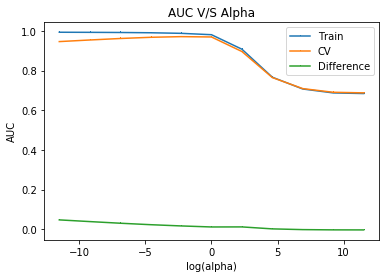

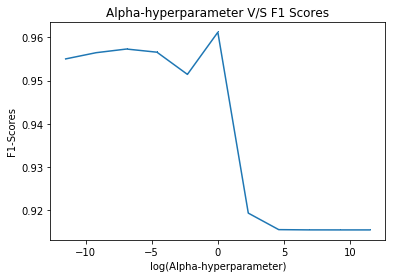

Accuracy score of Test Data is : 92.03540980176787


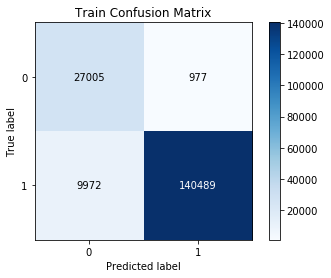

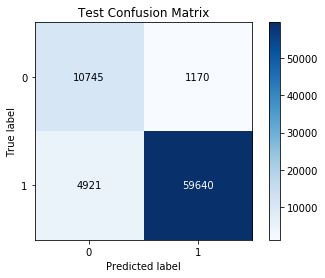

Best value of alpha is:  0.1


In [52]:
print(data['Score'].value_counts())
# As we can see there are large number of +ve examples and very less number of negative example, we need to use prior
best_alpha_tfidf_final, idx = NB_binary_clf(train_tfidf, cv_tfidf, train_label, cv_label, class_prior_=[1/2,1/2])
print("Best value of alpha is: ",best_alpha_tfidf_final)

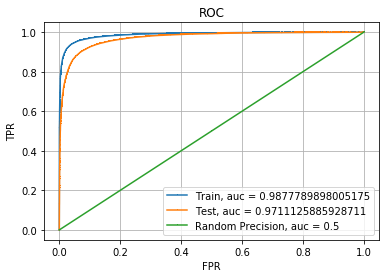

Accuracy score of Test Data is : 92.03540980176787


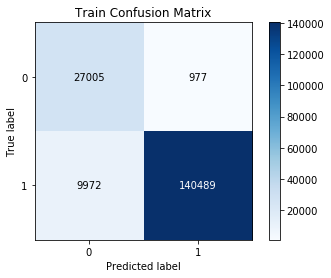

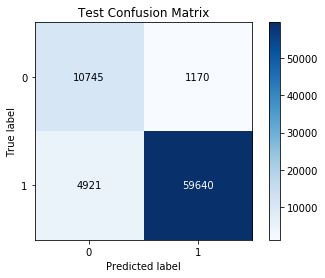

AUC of Test Data 97.1112588592871


In [53]:
auc_tfidf_final = NB_binary_clf(train_tfidf, cv_tfidf, train_label, cv_label, best_alpha=best_alpha_tfidf_final, test=True, class_prior_=[1/2,1/2])
print("AUC of Test Data" ,auc_tfidf_final*100)

In [54]:
features = np.array(tfidf.get_feature_names())

### [5.2.1] Top 10 important features of positive class from<font color='red'> SET 2</font>

In [55]:
print("Here are top 10 features from positive class: ")
for i in idx[1, features.shape[0]-11:features.shape[0]-1]:
    if i>features.shape[0]-1:
        i = i-(features.shape[0]-1)
        print(features[i], end=', ')
    else:
        print(features[i], end=', ')

Here are top 10 features from positive class: 
flavor, best, taste, product, like, love, not, coffee, tea, good, 

### [5.2.2] Top 10 important features of negative class from<font color='red'> SET 2</font>

In [56]:
print("Here are top 10 features from negative class: ")
for i in idx[0, features.shape[0]-11:features.shape[0]-1]:
    if i>features.shape[0]-1:
        i = i-(features.shape[0]-1)
        print(features[i], end=', ')
    else:
        print(features[i], end=', ')

Here are top 10 features from negative class: 
buy, good, flavor, no, one, coffee, would, product, taste, like, 

# [7] Conclusions

In [57]:
from prettytable import PrettyTable

In [58]:
p_table = PrettyTable()

p_table.field_names=('Vectorizer','Model','Hyper Parameter(alpha)','AUC(Percentage)')
p_table.add_row(['BOW','NO Feature Engineering',best_alpha_bow, auc_bow*100])
p_table.add_row(['TFIDF','NO Feature Engineering',best_alpha_tfidf, auc_tfidf*100])
p_table.add_row(['BOW','After Feature Engineering',best_alpha_bow_final, auc_bow_final*100])
p_table.add_row(['TFIDF','After Feature Engineering',best_alpha_tfidf_final, auc_tfidf_final*100])

print(p_table)

+------------+---------------------------+------------------------+-------------------+
| Vectorizer |           Model           | Hyper Parameter(alpha) |  AUC(Percentage)  |
+------------+---------------------------+------------------------+-------------------+
|    BOW     |   NO Feature Engineering  |          0.1           | 94.28990840185799 |
|   TFIDF    |   NO Feature Engineering  |          0.1           | 95.86502514483972 |
|    BOW     | After Feature Engineering |          0.1           | 95.93522468866085 |
|   TFIDF    | After Feature Engineering |          0.1           |  97.1112588592871 |
+------------+---------------------------+------------------------+-------------------+


In [59]:
print("As we can see the with Feature Engineering AUC of the model increases further\n")
print("Summary :-\n")
# Taken from https://github.com/krpiyush5
print('* First of all we can apply naive bayes only on positive values so we will only use BOW and TFIDF ')
print('* In Bag of Words method we first split whole preprocessed reviews into three datasets train,cross validation and test')
print('* After that applied count_vect.fit_transform() on train data and count_vect.transform() on cv and train data')
print('* Then we applied multinomial naive bayes for different alpha values and store the result in an array')
print('* After that we plotted curve between auc score and logarithm of alpha (since alpha ranges from 10^-5 to 10^5) ')
print('* we took the best alpha value for which auc value was maximum')
print('* Then again we fitted train data with our best alpha value and plotted ROC curve')
print('* After plotting ROC curve we plotted confusion matrix using heatmap for train and test data')
print('* At the end we listed our important positive and negative features using feature_log_prob_ (mentioned in sklearn)')
print('-'*50)
print('* In TFIDF method we used above splitted data')
print('* After that applied tf_idf_vect.fit_transform() on train data and tf_idf_vect.transform() on cv and train data')
print('* Then we applied multinomial naive bayes for different alpha values and store the result in an array')
print('* After that we plotted curve between auc score and logarithm of alpha (since alpha ranges from 10^-5 to 10^5) ')
print('* we took the best alpha value for which auc value was maximum')
print('* Then again we fitted train data with our best alpha value and plotted ROC curve')
print('* After plotting ROC curve we plotted confusion matrix using heatmap for train and test data')
print('* At the end we listed our important positive and negative features using feature_log_prob_ (mentioned in sklearn)')
print('-'*50)
print('for feature engineering we added review length and preprocessed summmary to preprocessed review and applied multinomial naive bayes like above ')
print('After that we summarised whole processes and plotted it using prettytable')
print('And found that after feature engineering our auc increased')

As we can see the with Feature Engineering AUC of the model increases further

Summary :-

* First of all we can apply naive bayes only on positive values so we will only use BOW and TFIDF 
* In Bag of Words method we first split whole preprocessed reviews into three datasets train,cross validation and test
* After that applied count_vect.fit_transform() on train data and count_vect.transform() on cv and train data
* Then we applied multinomial naive bayes for different alpha values and store the result in an array
* After that we plotted curve between auc score and logarithm of alpha (since alpha ranges from 10^-5 to 10^5) 
* we took the best alpha value for which auc value was maximum
* Then again we fitted train data with our best alpha value and plotted ROC curve
* After plotting ROC curve we plotted confusion matrix using heatmap for train and test data
* At the end we listed our important positive and negative features using feature_log_prob_ (mentioned in sklearn)
--------------